In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# <p style='text-align: center; text-decoration: underline; color: purple'>Analytics</p>

In [3]:
df = pd.read_csv('df_fit.csv')
df.head()

,ID,Mass_(kg),CO2_emission_(g/km),Fuel_type,Engine_size,Fuel_consumption_(l/100km)
0,51888563,1640.0,159.0,petrol,1.998,7.0
1,76365528,1254.0,133.0,petrol,1.199,5.9
2,46331900,1128.0,125.0,petrol,1.199,5.5
3,50193752,2142.0,202.0,diesel,1.950,7.7
4,56608150,1408.0,155.0,petrol,1.498,5.6


In [4]:
print(df.shape)
df.describe()

(1000000, 6)


,ID,Mass_(kg),CO2_emission_(g/km),Engine_size,Fuel_consumption_(l/100km)
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,6.424372e+07,1520.087186,152.981420,1.633702,6.512640
std,2.095789e+07,299.662054,30.915655,0.604882,1.234951
min,1.400000e+01,935.000000,44.000000,0.875000,5.500000
25%,5.184625e+07,1295.000000,133.000000,1.199000,5.800000
50%,7.479321e+07,1440.000000,144.000000,1.498000,6.200000
75%,8.086883e+07,1680.000000,160.000000,1.984000,6.800000
max,1.496951e+08,2996.000000,543.000000,6.749000,24.100000


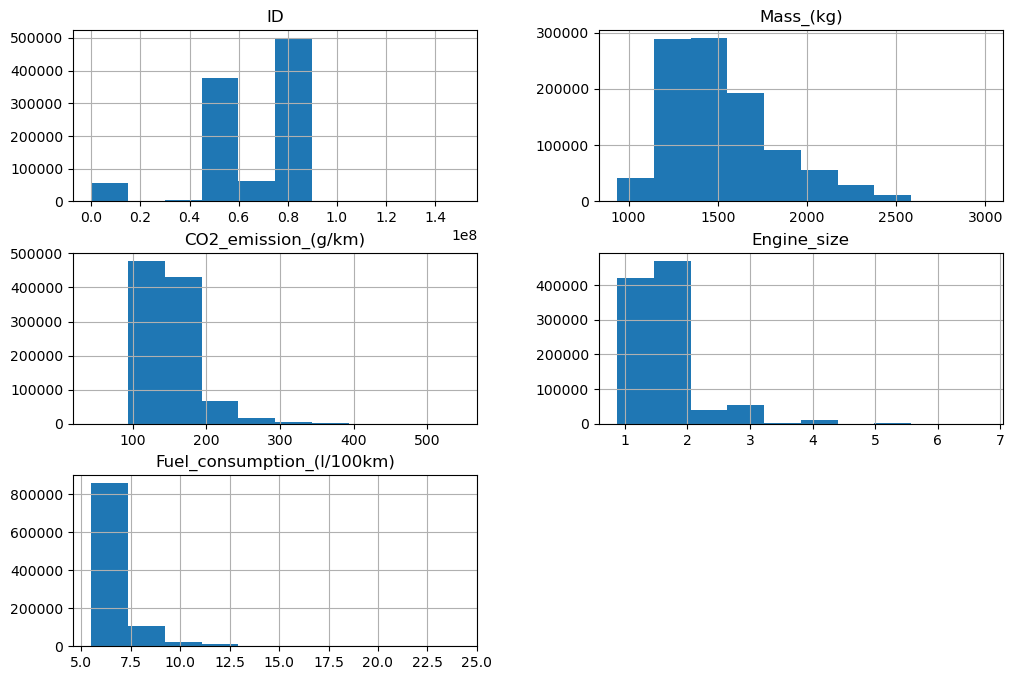

In [5]:
df.hist(figsize=(12, 8))
plt.show()

In [6]:
df1 = df[(df['Mass_(kg)'] >= 900) & (df['Mass_(kg)'] <= 3000)]
df1.head()

,ID,Mass_(kg),CO2_emission_(g/km),Fuel_type,Engine_size,Fuel_consumption_(l/100km)
0,51888563,1640.0,159.0,petrol,1.998,7.0
1,76365528,1254.0,133.0,petrol,1.199,5.9
2,46331900,1128.0,125.0,petrol,1.199,5.5
3,50193752,2142.0,202.0,diesel,1.950,7.7
4,56608150,1408.0,155.0,petrol,1.498,5.6


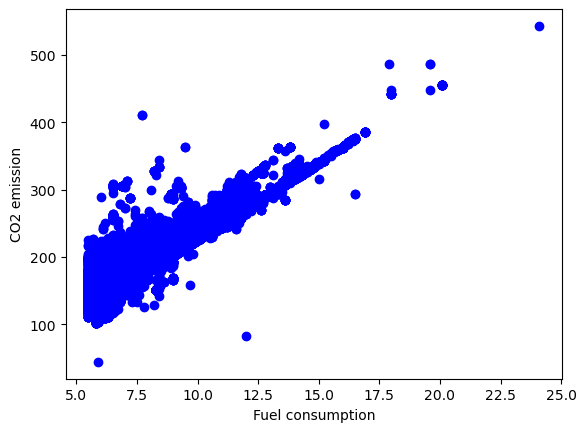

In [7]:
plt.scatter(df['Fuel_consumption_(l/100km)'], df['CO2_emission_(g/km)'], color='blue')
plt.xlabel('Fuel consumption')
plt.ylabel('CO2 emission')
plt.show()

In [8]:
df.sort_values('CO2_emission_(g/km)')

,ID,Mass_(kg),CO2_emission_(g/km),Fuel_type,Engine_size,Fuel_consumption_(l/100km)
713753,56396998,1495.0,44.0,petrol,1.332,5.9
208042,83753416,2724.0,82.0,petrol,2.995,12.0
244937,4066,1300.0,102.0,petrol,1.498,5.8
883445,230011,1300.0,102.0,petrol,1.498,5.8
575163,385287,1300.0,102.0,petrol,1.498,5.8
...,...,...,...,...,...,...
536068,80884042,2866.0,456.0,petrol,3.982,20.1
200037,56763443,1765.0,486.0,petrol,6.498,19.6
110015,61125610,1765.0,486.0,petrol,6.498,19.6
527879,55576356,1765.0,486.0,petrol,6.498,17.9


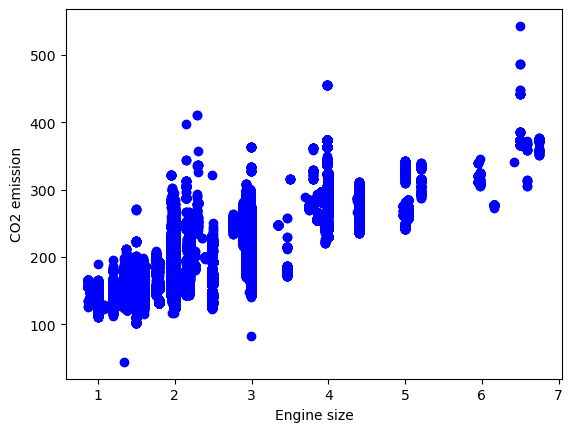

In [9]:
plt.scatter(df['Engine_size'], df['CO2_emission_(g/km)'], color='blue')
plt.xlabel('Engine size')
plt.ylabel('CO2 emission')
plt.show()

---

## Modelo de regresion lineal

### Entrenamiento

In [10]:
msk = np.random.rand(len(df)) < 0.8 #msk = mask. Lista de len(df) numeros aleatorios entre el 0 y 1. aproximadamente el 80% del conjunto (<0.8)
train = df[msk]
test = df[~msk]

In [11]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Engine_size']])
train_y = np.asanyarray(train[['CO2_emission_(g/km)']])
regr.fit(train_x, train_y)

#Coeficientes
print('Pendiente:', regr.coef_)
print('Interseccion', regr.intercept_)

Pendiente: [[38.63569623]]
Interseccion [89.83872015]


##### Graficamos el resultado

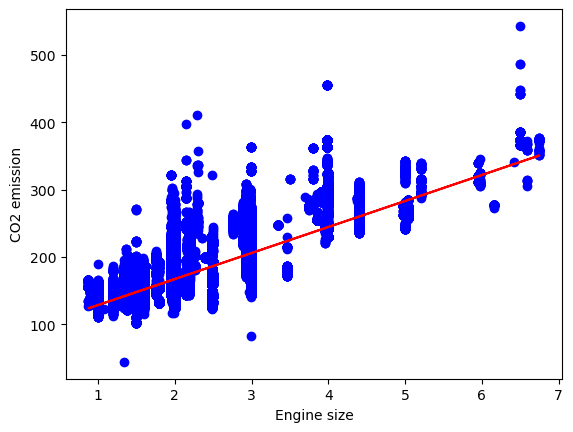

In [12]:
plt.scatter(train['Engine_size'], train['CO2_emission_(g/km)'], color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Engine size')
plt.ylabel('CO2 emission')
plt.show()

### Testeo

In [13]:
from sklearn.metrics import r2_score, mean_squared_error

test_x = np.asanyarray(test[['Engine_size']])
test_y = np.asanyarray(test[['CO2_emission_(g/km)']])
test_y_ = regr.predict(test_x)

print('Error medio absoluto: %.2f' % np.mean(np.absolute(test_y_ - test_y)))
print('Residual de la suma de los cuadrados (MSE): %0.2f' % np.mean((test_y_ - test_y)**2))
print('R2-score: %0.2f' % r2_score(test_y, test_y_))

Error medio absoluto: 13.89
Residual de la suma de los cuadrados (MSE): 409.51
R2-score: 0.57


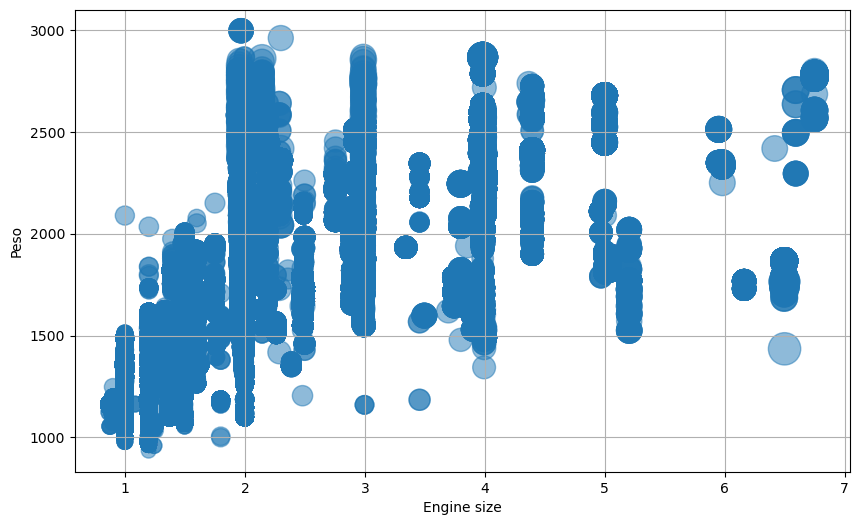

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Engine_size'], df['Mass_(kg)'], s=df['CO2_emission_(g/km)'], alpha=0.5)
plt.xlabel('Engine size')
plt.ylabel('Peso')
plt.grid(True)
plt.show()

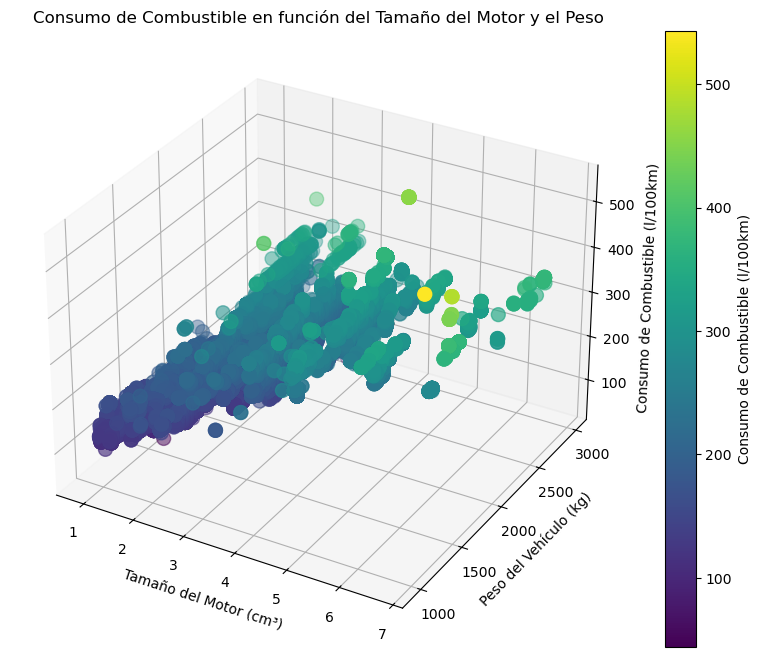

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = df['Engine_size']
y = df['Mass_(kg)']
z = df['CO2_emission_(g/km)']

scatter = ax.scatter(x, y, z, c=z, cmap='viridis', s=100)
ax.set_xlabel('Tamaño del Motor (cm³)')
ax.set_ylabel('Peso del Vehículo (kg)')
ax.set_zlabel('Consumo de Combustible (l/100km)')
ax.set_title('Consumo de Combustible en función del Tamaño del Motor y el Peso')

plt.colorbar(scatter, label='Consumo de Combustible (l/100km)')

plt.show()

---
---
---
---
---

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


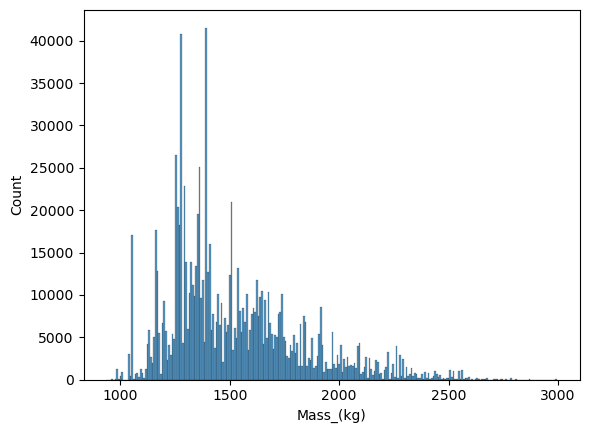

In [16]:
sns.histplot(df['Mass_(kg)'])
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


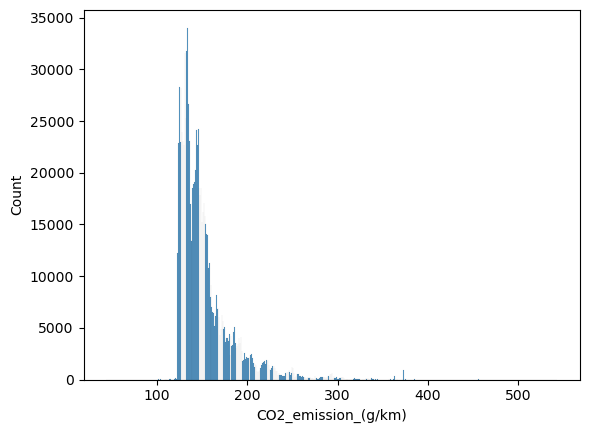

In [17]:
sns.histplot(df['CO2_emission_(g/km)'])
plt.show()

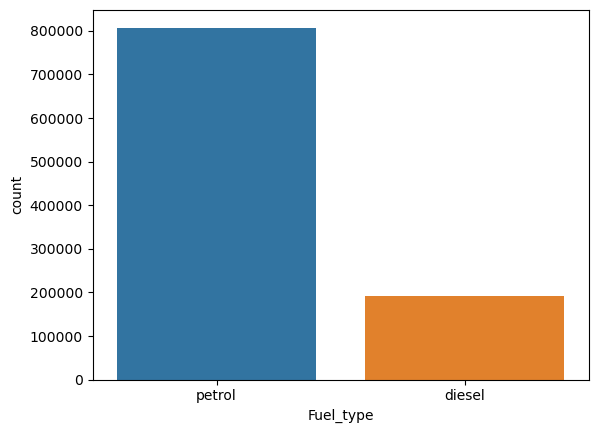

In [18]:
sns.countplot(x='Fuel_type', data=df)
plt.show()

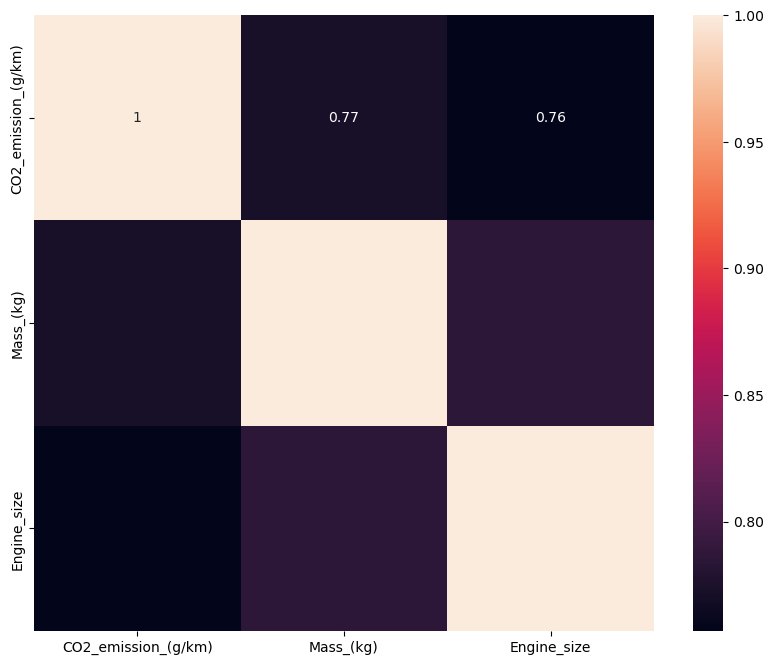

In [19]:
# Calcular la matriz de correlación
correlation_matrix = df[['CO2_emission_(g/km)', 'Mass_(kg)', 'Engine_size']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [20]:
df2 = pd.get_dummies(df, columns=['Fuel_type'], drop_first=True)

from sklearn.model_selection import train_test_split
x = df2.drop('CO2_emission_(g/km)', axis=1)
y = df2['CO2_emission_(g/km)']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

Mean Squared Error:  26.929499554248796
R2 Score:  0.9718120745285569


In [22]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

Mean Squared Error:  1.8673310388888893
R2 Score:  0.9980454078603028
